<a href="https://colab.research.google.com/github/Vecheslav-Eremeev/keras_projects/blob/main/Keras_fetch_20newsgroups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Embedding, Dropout, Dense, LSTM, SimpleRNN, GRU
from keras.layers import Flatten, MaxPooling1D, GlobalMaxPooling1D, Conv1D
from keras.callbacks import EarlyStopping, ModelCheckpoint

Load Data

In [3]:
data = fetch_20newsgroups()
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [ ]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
data.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [5]:
data.target[0]

7

In [6]:
data.target_names[data.target[0]]

'rec.autos'

In [7]:
text = data.data
len(text)

11314

In [8]:
target = data.target
len(target)

11314

In [9]:
num_words = 3000
max_len = 30

In [10]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)
sequences = pad_sequences(sequences, maxlen=max_len)
sequences.shape

(11314, 30)

In [11]:
y = to_categorical(target)
y.shape

(11314, 20)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(sequences, y, random_state=42, test_size=0.15)

Train models

In [13]:
def train_model(model, epochs=30, batch_size=128):
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
  callbacks_list = [
    EarlyStopping(monitor='val_acc', patience=5),
    ModelCheckpoint(filepath='my_model.h5', monitor='val_loss', save_best_only=True)
  ]
  history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.15, callbacks=callbacks_list)

  print(model.evaluate(X_test, y_test))
  return history


In [14]:
def show_loss_model(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_plot = np.arange(1, len(loss) + 1)
  plt.clf()

  plt.plot(epochs_plot, loss, 'r', label='Training loss')
  plt.plot(epochs_plot, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [15]:
def show_accuracy_model(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  epochs_plot = np.arange(1, len(acc) + 1)
  plt.clf()

  plt.plot(epochs_plot, acc, 'r', label='Training acc')
  plt.plot(epochs_plot, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation acc')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

Simple Dense Model

In [16]:
model = Sequential([
                    Embedding(num_words, 16, input_length=max_len),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dropout(0.25),
                    Dense(20, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 16)            48000     
                                                                 
 flatten (Flatten)           (None, 480)               0         
                                                                 
 dense (Dense)               (None, 64)                30784     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                1300      
                                                                 
Total params: 80,084
Trainable params: 80,084
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = train_model(model)

Epoch 1/30
64/64 [==============================] - 3s 10ms/step - loss: 2.9860 - acc: 0.0854 - val_loss: 2.9715 - val_acc: 0.1178
Epoch 2/30
64/64 [==============================] - 0s 7ms/step - loss: 2.9203 - acc: 0.1933 - val_loss: 2.9036 - val_acc: 0.1642
Epoch 3/30
64/64 [==============================] - 0s 7ms/step - loss: 2.7554 - acc: 0.2666 - val_loss: 2.7478 - val_acc: 0.2190
Epoch 4/30
64/64 [==============================] - 0s 7ms/step - loss: 2.4228 - acc: 0.3635 - val_loss: 2.4969 - val_acc: 0.2855
Epoch 5/30
64/64 [==============================] - 0s 6ms/step - loss: 2.0180 - acc: 0.4512 - val_loss: 2.2990 - val_acc: 0.3209
Epoch 6/30
64/64 [==============================] - 0s 7ms/step - loss: 1.6867 - acc: 0.5336 - val_loss: 2.1926 - val_acc: 0.3416
Epoch 7/30
64/64 [==============================] - 0s 6ms/step - loss: 1.4098 - acc: 0.6137 - val_loss: 2.1370 - val_acc: 0.3590
Epoch 8/30
64/64 [==============================] - 0s 7ms/step - loss: 1.1905 - acc: 0.6

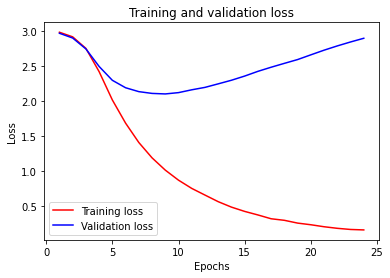

In [18]:
show_loss_model(history)

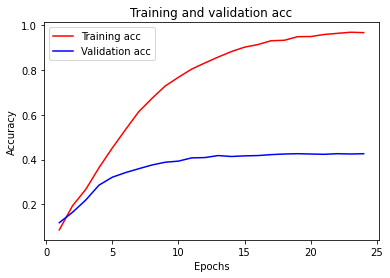

In [19]:
show_accuracy_model(history)

Dense Model N_2

In [20]:
model = Sequential([
                    Embedding(num_words, 8, input_length=max_len),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dropout(0.5),
                    Dense(20, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 8)             24000     
                                                                 
 flatten_1 (Flatten)         (None, 240)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                15424     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                1300      
                                                                 
Total params: 40,724
Trainable params: 40,724
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = train_model(model)

Epoch 1/30
64/64 [==============================] - 1s 10ms/step - loss: 2.9913 - acc: 0.0644 - val_loss: 2.9834 - val_acc: 0.0880
Epoch 2/30
64/64 [==============================] - 0s 7ms/step - loss: 2.9661 - acc: 0.1100 - val_loss: 2.9625 - val_acc: 0.1289
Epoch 3/30
64/64 [==============================] - 0s 7ms/step - loss: 2.9200 - acc: 0.1548 - val_loss: 2.9143 - val_acc: 0.1490
Epoch 4/30
64/64 [==============================] - 0s 7ms/step - loss: 2.8309 - acc: 0.1939 - val_loss: 2.8354 - val_acc: 0.1850
Epoch 5/30
64/64 [==============================] - 0s 7ms/step - loss: 2.6767 - acc: 0.2462 - val_loss: 2.7092 - val_acc: 0.2252
Epoch 6/30
64/64 [==============================] - 0s 7ms/step - loss: 2.4633 - acc: 0.3004 - val_loss: 2.5582 - val_acc: 0.2592
Epoch 7/30
64/64 [==============================] - 0s 7ms/step - loss: 2.2559 - acc: 0.3443 - val_loss: 2.4347 - val_acc: 0.2814
Epoch 8/30
64/64 [==============================] - 0s 7ms/step - loss: 2.0664 - acc: 0.3

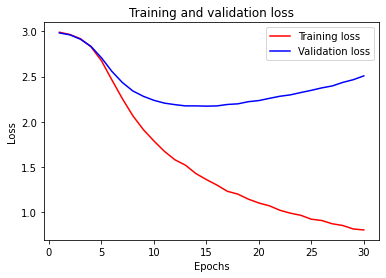

In [22]:
show_loss_model(history)

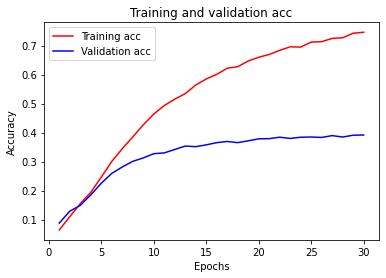

In [23]:
show_accuracy_model(history)

SimpleRNN Model

In [24]:
model = Sequential([
                    Embedding(num_words, 16, input_length=max_len),
                    SimpleRNN(8, return_sequences=True),
                    SimpleRNN(8),
                    Dense(20, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 30, 16)            48000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 30, 8)             200       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 20)                180       
                                                                 
Total params: 48,516
Trainable params: 48,516
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = train_model(model)

Epoch 1/30
64/64 [==============================] - 9s 113ms/step - loss: 2.9695 - acc: 0.0902 - val_loss: 2.8902 - val_acc: 0.1303
Epoch 2/30
64/64 [==============================] - 7s 105ms/step - loss: 2.7664 - acc: 0.1898 - val_loss: 2.7928 - val_acc: 0.1733
Epoch 3/30
64/64 [==============================] - 7s 108ms/step - loss: 2.5505 - acc: 0.2753 - val_loss: 2.7173 - val_acc: 0.2017
Epoch 4/30
64/64 [==============================] - 7s 102ms/step - loss: 2.3463 - acc: 0.3382 - val_loss: 2.6715 - val_acc: 0.2169
Epoch 5/30
64/64 [==============================] - 6s 101ms/step - loss: 2.1703 - acc: 0.3950 - val_loss: 2.6584 - val_acc: 0.2259
Epoch 6/30
64/64 [==============================] - 7s 106ms/step - loss: 2.0200 - acc: 0.4448 - val_loss: 2.6502 - val_acc: 0.2363
Epoch 7/30
64/64 [==============================] - 7s 103ms/step - loss: 1.8880 - acc: 0.4811 - val_loss: 2.6698 - val_acc: 0.2419
Epoch 8/30
64/64 [==============================] - 7s 116ms/step - loss: 1.

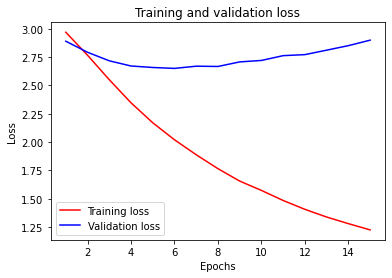

In [26]:
show_loss_model(history)

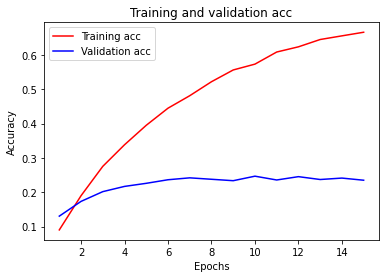

In [27]:
show_accuracy_model(history)

LSTM Model

In [28]:
model = Sequential([
                    Embedding(num_words, 16, input_length=max_len),
                    LSTM(32, return_sequences=True),
                    LSTM(16),
                    Dense(20, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 30, 16)            48000     
                                                                 
 lstm (LSTM)                 (None, 30, 32)            6272      
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense_5 (Dense)             (None, 20)                340       
                                                                 
Total params: 57,748
Trainable params: 57,748
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = train_model(model)

Epoch 1/30
64/64 [==============================] - 8s 33ms/step - loss: 2.9852 - acc: 0.0657 - val_loss: 2.9227 - val_acc: 0.0797
Epoch 2/30
64/64 [==============================] - 1s 18ms/step - loss: 2.7574 - acc: 0.1100 - val_loss: 2.6592 - val_acc: 0.1587
Epoch 3/30
64/64 [==============================] - 1s 19ms/step - loss: 2.4857 - acc: 0.1916 - val_loss: 2.5319 - val_acc: 0.2190
Epoch 4/30
64/64 [==============================] - 1s 20ms/step - loss: 2.2816 - acc: 0.2620 - val_loss: 2.4589 - val_acc: 0.2405
Epoch 5/30
64/64 [==============================] - 1s 18ms/step - loss: 2.1287 - acc: 0.3252 - val_loss: 2.4664 - val_acc: 0.2377
Epoch 6/30
64/64 [==============================] - 1s 18ms/step - loss: 1.9974 - acc: 0.3636 - val_loss: 2.4068 - val_acc: 0.2730
Epoch 7/30
64/64 [==============================] - 1s 18ms/step - loss: 1.8847 - acc: 0.4140 - val_loss: 2.4555 - val_acc: 0.2661
Epoch 8/30
64/64 [==============================] - 1s 18ms/step - loss: 1.8073 - a

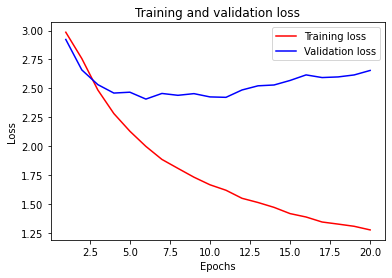

In [30]:
show_loss_model(history)

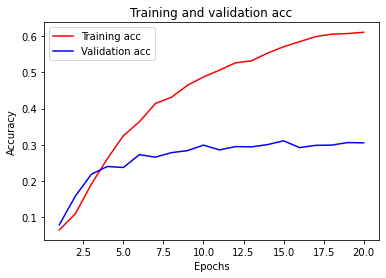

In [31]:
show_accuracy_model(history)

GRU Model

In [32]:
model = Sequential([
                    Embedding(num_words, 16, input_length=max_len),
                    GRU(32, return_sequences=True),
                    GRU(32),
                    Dense(20, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 30, 16)            48000     
                                                                 
 gru (GRU)                   (None, 30, 32)            4800      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense_6 (Dense)             (None, 20)                660       
                                                                 
Total params: 59,796
Trainable params: 59,796
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = train_model(model)

Epoch 1/30
64/64 [==============================] - 6s 33ms/step - loss: 2.9891 - acc: 0.0558 - val_loss: 2.9733 - val_acc: 0.1040
Epoch 2/30
64/64 [==============================] - 1s 18ms/step - loss: 2.8281 - acc: 0.1101 - val_loss: 2.7302 - val_acc: 0.1344
Epoch 3/30
64/64 [==============================] - 1s 19ms/step - loss: 2.5264 - acc: 0.1874 - val_loss: 2.5663 - val_acc: 0.1760
Epoch 4/30
64/64 [==============================] - 1s 20ms/step - loss: 2.2535 - acc: 0.2579 - val_loss: 2.4347 - val_acc: 0.2370
Epoch 5/30
64/64 [==============================] - 1s 19ms/step - loss: 2.0500 - acc: 0.3300 - val_loss: 2.3769 - val_acc: 0.2730
Epoch 6/30
64/64 [==============================] - 1s 19ms/step - loss: 1.8941 - acc: 0.3815 - val_loss: 2.3760 - val_acc: 0.2924
Epoch 7/30
64/64 [==============================] - 1s 20ms/step - loss: 1.7460 - acc: 0.4207 - val_loss: 2.3505 - val_acc: 0.3125
Epoch 8/30
64/64 [==============================] - 1s 19ms/step - loss: 1.6261 - a

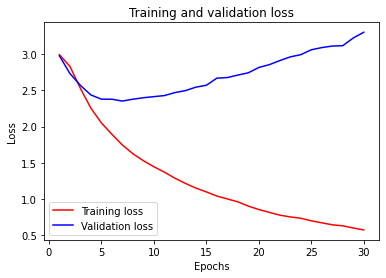

In [34]:
show_loss_model(history)

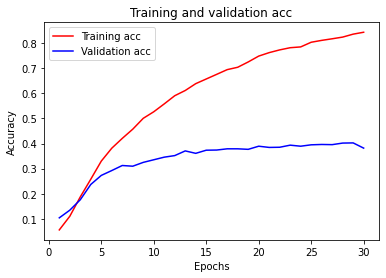

In [35]:
show_accuracy_model(history)

Conv1d Model

In [36]:
model = Sequential([
                    Embedding(num_words, 16, input_length=max_len),
                    Conv1D(32, 7, activation='relu'),
                    MaxPooling1D(3),
                    Conv1D(32, 5, activation='relu'),
                    GlobalMaxPooling1D(),
                    Dense(20, activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 30, 16)            48000     
                                                                 
 conv1d (Conv1D)             (None, 24, 32)            3616      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 8, 32)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 4, 32)             5152      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_7 (Dense)             (None, 20)               

In [37]:
history = train_model(model)

Epoch 1/30
64/64 [==============================] - 7s 14ms/step - loss: 2.9907 - acc: 0.0536 - val_loss: 2.9859 - val_acc: 0.0700
Epoch 2/30
64/64 [==============================] - 1s 9ms/step - loss: 2.9626 - acc: 0.0975 - val_loss: 2.9459 - val_acc: 0.1040
Epoch 3/30
64/64 [==============================] - 1s 9ms/step - loss: 2.8155 - acc: 0.1702 - val_loss: 2.6882 - val_acc: 0.1857
Epoch 4/30
64/64 [==============================] - 1s 9ms/step - loss: 2.4001 - acc: 0.2698 - val_loss: 2.4142 - val_acc: 0.2405
Epoch 5/30
64/64 [==============================] - 1s 8ms/step - loss: 2.0539 - acc: 0.3580 - val_loss: 2.3153 - val_acc: 0.2800
Epoch 6/30
64/64 [==============================] - 1s 9ms/step - loss: 1.8118 - acc: 0.4402 - val_loss: 2.2870 - val_acc: 0.3146
Epoch 7/30
64/64 [==============================] - 1s 9ms/step - loss: 1.6177 - acc: 0.4954 - val_loss: 2.2514 - val_acc: 0.3216
Epoch 8/30
64/64 [==============================] - 1s 9ms/step - loss: 1.4427 - acc: 0.5

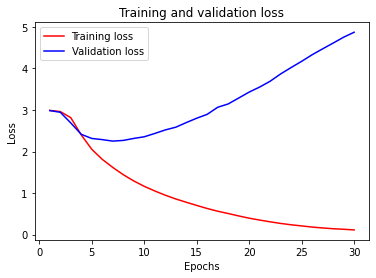

In [38]:
show_loss_model(history)

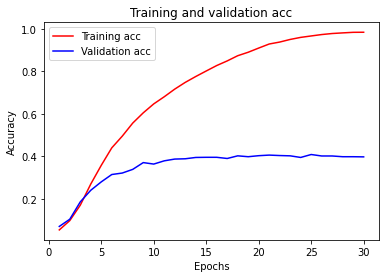

In [39]:
show_accuracy_model(history)